In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# 이미지 증강 객체 작성
gen = ImageDataGenerator(rotation_range = 15,
                        width_shift_range = 0.3,
                        shear_range = 0.1,
                        rescale=1./255)

In [3]:
# 증강 이미지 적용 및 실행
data_path = './data/flower_photos'
batch_siz = 2313

data_gen = gen.flow_from_directory(directory = data_path,
                                   batch_size = batch_siz,
                                   shuffle = True,
                                   target_size = (100, 100),
                                   class_mode = 'categorical')

img, label = data_gen.next()
print(len(img))

Found 2313 images belonging to 5 classes.
2313


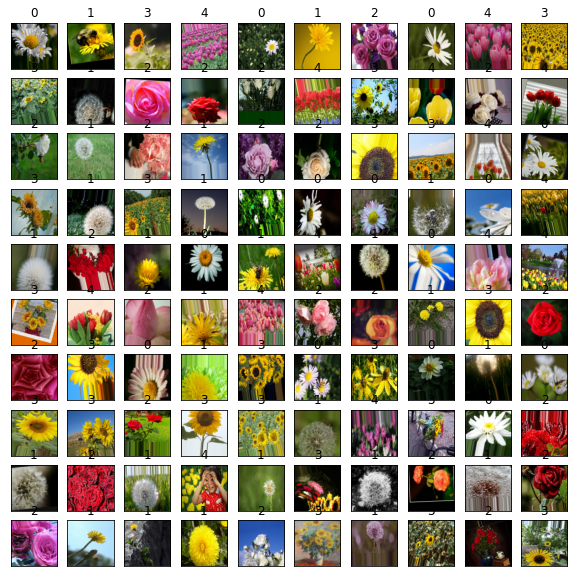

In [4]:
plt.figure(figsize=(10,10))

for i in range(100):
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])
#     plt.imshow(img[i])

In [5]:
result = []

for i in range(2313):
  result.append(np.argmax(label[i]))

result = np.array(result).reshape(-1, 1)
result.shape

(2313, 1)

In [6]:
#train_data, test_data split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img, result,test_size=0.3, shuffle=False, random_state=1004)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

KeyboardInterrupt: 

In [ ]:
# cnn 모델로 훈련

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

cnn = Sequential()

# cnn.add(Conv2D(input_shape=(32,32,3) , kernel_size=(3,3), padding='same' ,filters=32 ,activation='relu' ))
cnn.add(Conv2D(32, (3,3), padding='same' ,activation='relu', input_shape=(100,100,3) ))
cnn.add(Conv2D(32, (3,3),padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3,3),padding='same', activation='relu'))
cnn.add(Conv2D(64, (3,3),padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3,3),padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256, (3,3),padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))


cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))


cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                        

In [ ]:
# 평가, 예측
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

start_time = datetime.now() # 현재 시간

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# 손실함수가 5 epochs을 진행을 검사하여 더 이상 줄어들지 않으면 종료
# EarlyStopping(모니터링 값, 대기 epochs)

early_stoping = EarlyStopping(monitor='val_loss', patience=5)

# 학습 중인 모델을 자동 저장
model_checkpoint= ModelCheckpoint(filepath="/data/flower_bast.h5",
                                  monitor='val_loss',
                                  save_base_only = True,
                                  verbose = 1)

hist = cnn.fit(x_train, y_train, batch_size = 110, epochs = 250, validation_data =(x_test, y_test),
               callbacks = [early_stoping, model_checkpoint])

# hist = cnn.fit(x_train, t_train, batch_size = 128, epochs = 30, validation_data =(x_test, t_test))

end_time = datetime.now()
print('Elapsed Time => ', end_time - start_time)

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2.3152 - accuracy: 0.1544
Epoch 1: saving model to /data\flower_bast.h5
1/1 [==============================] - 49s 49s/step - loss: 2.3152 - accuracy: 0.1544 - val_loss: 2.0385 - val_accuracy: 0.1772
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2.8807 - accuracy: 0.2069
Epoch 2: saving model to /data\flower_bast.h5
1/1 [==============================] - 27s 27s/step - loss: 2.8807 - accuracy: 0.2069 - val_loss: 1.7708 - val_accuracy: 0.2450
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2.3008 - accuracy: 0.2038
Epoch 3: saving model to /data\flower_bast.h5
1/1 [==============================] - 27s 27s/step - loss: 2.3008 - accuracy: 0.2038 - val_loss: 1.8424 - val_accuracy: 0.2003
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 1.9322 - accuracy: 0.2162
Epoch 4: saving model to /data\flower_bast.h5
1/1 [==============================] - 27s 27s/step - loss: 1.93

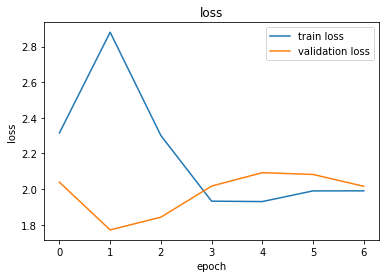

In [ ]:
# loss, accuracy  그래프 작성(1)

plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best') # 범례를 최적의 위치에 알아서 위치시켜줌
plt.show()

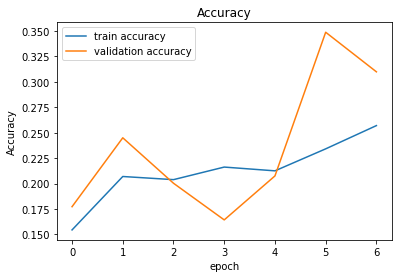

In [ ]:
# loss, accuracy  그래프 작성(2)

plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best') # 범례를 최적의 위치에 알아서 위치시켜줌
plt.show()